## About the Data

In this notebook, a dataset on car prices is analyzed to build models predicting car prices. The dataset can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data) with more information on the dataset [here](https://archive.ics.uci.edu/dataset/10/automobile).

## Setting Up Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

!pip install spicy
from spicy import stats

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

## Importing Data and Data Wrangling

First, let's import the data set and view its first 5 rows.

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Although the column headers are missing, they are provided [here](https://archive.ics.uci.edu/dataset/10/automobile). We can add those headers to the data frame.

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Notice that the null values are expressed as question marks. Let's replace those "?" as "NaN" and count the number of null values in each column.

In [4]:
df.replace("?", np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

"True" indicates null values. Now let's clean up the null values. First, we replace the null values in "normalized-losses," "bore," "stroke," "horsepower," and "peak-rpm" with their means.

In [7]:
#Replace with mean
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

avg_bore = df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)

avg_stroke = df["stroke"].astype("float").mean(axis = 0)
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm = df["peak-rpm"].astype("float").mean(axis=0)
df["peak-rpm"].replace(np.nan, avg_peakrpm, inplace=True)

Next, let's replace the null values in "num-of-doors" with its mode.

In [8]:
#Replace by most frequent value
frequent_num_of_doors = df["num-of-doors"].value_counts().idxmax()
df["num-of-doors"].replace(np.nan, frequent_num_of_doors, inplace=True)

Finally, we drop the rows with null values in "price."

In [9]:
#Drop rows with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

#Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

Let's view our new data frame.

In [10]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Let's check if there are any duplicates.

In [11]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


Let's check the data type of each column and correct the data types if necessary.

In [12]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

There are a few columns that should be corrected to `int` or `float` type.

In [13]:
#Correct the data type
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["horsepower", "peak-rpm"]] = df[["horsepower", "peak-rpm"]].astype("float")
df[["price"]] = df[["price"]].astype("float")

In [14]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Let's normalize "length," "width," and "height" by simple feature scaling.

In [15]:
#Normalize data with simple feature scaling
df["length"] = df["length"]/df["length"].max()
df["width"] = df["width"]/df["width"].max()
df["height"] = df["height"]/df["height"].max()
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Next, let's create indicator variables, or dummy variables, for "fuel-type" and "aspiration" to turn them into numerical data.

In [16]:
#Indicator variable for "fuel-type"
dummy_fuel = pd.get_dummies(df["fuel-type"])
dummy_fuel.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)

#Merge data frames "df" and "dummy_fuel"
df = pd.concat([df, dummy_fuel], axis=1)

#Drop the original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0,1


In [17]:
#Indicator variable for "aspiration"
dummy_aspiration = pd.get_dummies(df["aspiration"])
dummy_aspiration.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

#Merge data frames "df" and "dummy_aspiration"
df = pd.concat([df, dummy_aspiration], axis=1)

#Drop the original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,9.0,111.0,5000.0,21,27,13495.0,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,9.0,111.0,5000.0,21,27,16500.0,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,9.0,154.0,5000.0,19,26,16500.0,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,10.0,102.0,5500.0,24,30,13950.0,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,8.0,115.0,5500.0,18,22,17450.0,0,1,1,0


## Exploratory Data Analysis

Now let's explore the data to see which features might have significant impacts on price. First, let's look at some categorical data.

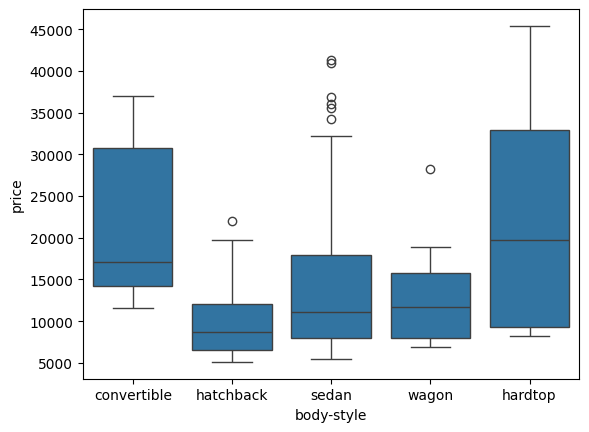

In [18]:
#Box plot for "body-style"
sns.boxplot(x="body-style", y="price", data=df)
plt.show()

As the box plot above shows, the distributions of price across different body styles have many overlaps, so body style is not a good predictor of price.

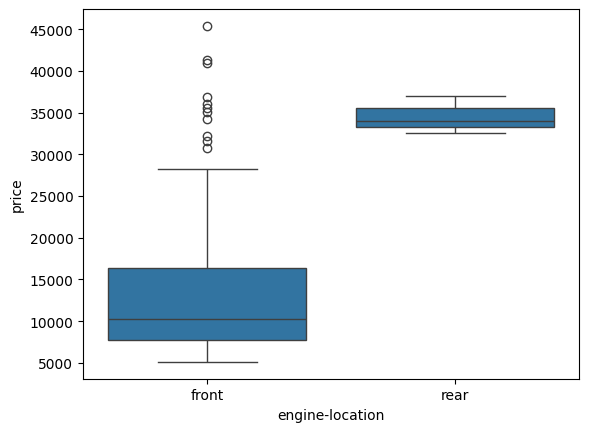

In [19]:
#Box plot for "engine-location"
sns.boxplot(x="engine-location", y="price", data=df)
plt.show()

The distributions of price across different engine locations are drastically different, so engine location might be a good predictor of price.

In [20]:
engine_loc_counts = df["engine-location"].value_counts().to_frame()
engine_loc_counts.rename(columns={"engine-location": "value_counts"}, inplace=True)
engine_loc_counts.index.name = "engine-location"
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


However, the data is heavily skewed towards front engine. So, engine location is not a good predictor of price.

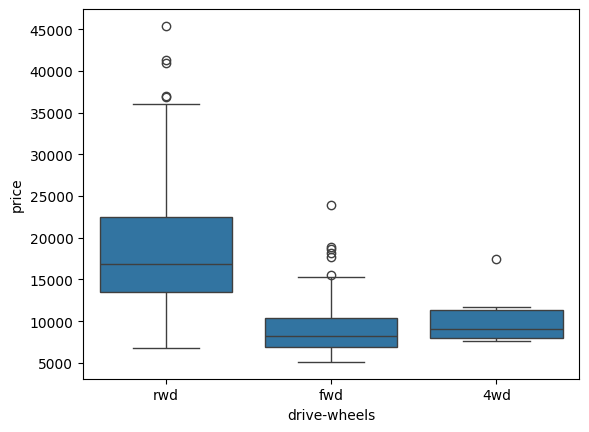

In [21]:
#Box plot for "drive-wheels"
sns.boxplot(x="drive-wheels", y="price", data=df)
plt.show()

In [22]:
drive_wheels_counts = df["drive-wheels"].value_counts().to_frame()
drive_wheels_counts.rename(columns={"drive-wheels": "value_counts"}, inplace=True)
drive_wheels_counts.index.name = "drive-wheels"
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


The distributions of price across different types of drive wheels don't have many overlaps, and the data is not heavily skewed towards any particular type of drive wheels, so the type of drive wheels is a good predictor of price. We can also see the average price for each type of drive wheels in the table below.

In [23]:
df_group = df[["drive-wheels","price"]]
df_group = df_group.groupby(["drive-wheels"], as_index=False).mean(numeric_only=True)
df_group

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


Now let's see how the numerical features correlate with price. We can do so by looking at the correlation coefficients.

In [24]:
df.corr(numeric_only=True)[['price']]

,price
symboling,-0.082391
normalized-losses,0.133999
wheel-base,0.584642
length,0.690628
width,0.751265
height,0.135486
curb-weight,0.834415
engine-size,0.872335
bore,0.543155
stroke,0.082269


We can see that the following features have strong correlations with price:
- "wheel-base"
- "horsepower"
- "length"
- "width"
- "curb-weight"
- "engine-size"
- "bore"
- "city-mpg"
- "highway-mpg"

Let's also find the p-values to see if these correlations are statistically significant.

In [25]:
pearson_coef, p_value = stats.pearsonr(df["wheel-base"], df["price"])
print("The correlation coefficient is", pearson_coef, "with a p-value of", p_value)

The correlation coefficient is 0.584641822265508 with a p-value of 8.076488270732885e-20


In [26]:
pearson_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])
print("The correlation coefficient is", pearson_coef, "with a p-value of", p_value)

The correlation coefficient is 0.8095745670036559 with a p-value of 6.369057428259557e-48


In [27]:
pearson_coef, p_value = stats.pearsonr(df["length"], df["price"])
print("The correlation coefficient is", pearson_coef, "with a p-value of", p_value)

The correlation coefficient is 0.6906283804483639 with a p-value of 8.01647746615924e-30


In [28]:
pearson_coef, p_value = stats.pearsonr(df["width"], df["price"])
print("The correlation coefficient is", pearson_coef, "with a p-value of", p_value)

The correlation coefficient is 0.7512653440522673 with a p-value of 9.20033551048206e-38


In [29]:
pearson_coef, p_value = stats.pearsonr(df["curb-weight"], df["price"])
print("The correlation coefficient is", pearson_coef, "with a p-value of", p_value)

The correlation coefficient is 0.8344145257702843 with a p-value of 2.189577238893965e-53


In [30]:
pearson_coef, p_value = stats.pearsonr(df["engine-size"], df["price"])
print("The correlation coefficient is", pearson_coef, "with a p-value of", p_value)

The correlation coefficient is 0.8723351674455185 with a p-value of 9.265491622198793e-64


In [31]:
pearson_coef, p_value = stats.pearsonr(df["bore"], df["price"])
print("The correlation coefficient is", pearson_coef, "with a p-value of", p_value)

The correlation coefficient is 0.5431553832626602 with a p-value of 8.049189483935315e-17


In [32]:
pearson_coef, p_value = stats.pearsonr(df["city-mpg"], df["price"])
print("The correlation coefficient is", pearson_coef, "with a p-value of", p_value)

The correlation coefficient is -0.6865710067844678 with a p-value of 2.3211320655675098e-29


In [33]:
pearson_coef, p_value = stats.pearsonr(df["highway-mpg"], df["price"])
print("The correlation coefficient is", pearson_coef, "with a p-value of", p_value)

The correlation coefficient is -0.704692265058953 with a p-value of 1.749547114447557e-31


Since the p-values are all less than 0.05, these correlations are all statistically significant. In conclusion, the following features are strong predictors of price:
- "drive-wheels"
- "wheel-base"
- "horsepower"
- "length"
- "width"
- "curb-weight"
- "engine-size"
- "bore"
- "city-mpg"
- "highway-mpg"

## Building, Evaluating, and Refining Models

Let's try building a simple linear regression model predicting the car price based on the "engine-size" feature.

In [34]:
lr = LinearRegression()

In [35]:
X = df[["engine-size"]]
Y = df["price"]
lr.fit(X,Y)

LinearRegression()

In [36]:
lr.intercept_

-7963.338906281042

In [37]:
lr.coef_

array([166.86001569])

So, the trend line in this model is given by y = -7963.3389 + 166.8600*x. We can see this visually below.

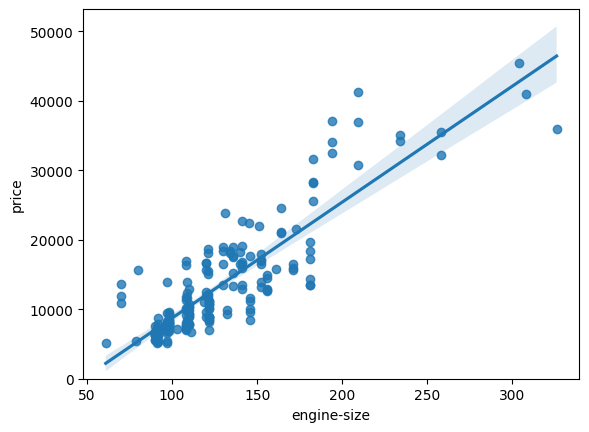

In [38]:
plt.figure()
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
plt.show()

We can do a quick check to see if the simple linear regression model works well by looking at the residual plot.

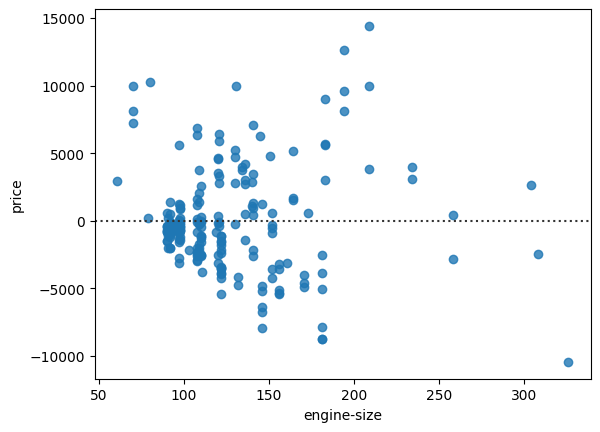

In [39]:
plt.figure()
sns.residplot(x=df["engine-size"], y=df["price"])
plt.show()

As we can see, the data is not really evenly distributed around the x axis, so we can improve the model further. Let's try a third order polynomial regression model.

In [40]:
pr = PolynomialFeatures(degree=3, include_bias=False)
X_pr = pr.fit_transform(X)
poly = LinearRegression()
poly.fit(X_pr, Y)

LinearRegression()

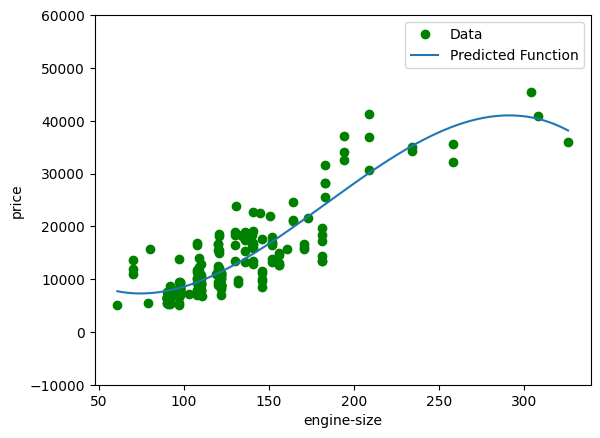

In [41]:
plt.figure()

xmax = df["engine-size"].values.max()
xmin = df["engine-size"].values.min()
x = np.arange(xmin, xmax, 0.1)
x_pr = pr.fit_transform(x.reshape(-1, 1))

plt.plot(df["engine-size"], df["price"], "go", label="Data")
plt.plot(x, poly.predict(x_pr), label="Predicted Function")
plt.ylim([-10000, 60000])
plt.ylabel("price")
plt.xlabel("engine-size")
plt.legend()
plt.show()

Let's also try a multiple linear regression model based on the features "engine-size," "curb-weight," "horsepower," "width," and "highway-mpg."

In [42]:
multilr = LinearRegression()
X_multi = df[["engine-size", "curb-weight", "horsepower", "width", "highway-mpg"]]
multilr.fit(X_multi, Y)

LinearRegression()

We can visually see roughly how well the model matches with the actual data from the graph below.

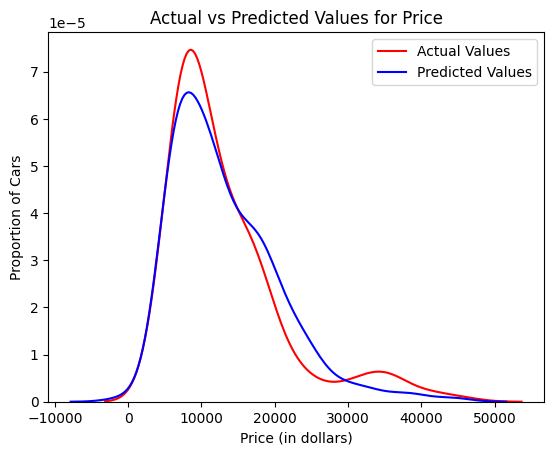

In [43]:
plt.figure()

Y_hat = multilr.predict(X_multi)
ax = sns.kdeplot(Y, color="r", label="Actual Values")
sns.kdeplot(Y_hat, color="b", label="Predicted Values" , ax=ax)

plt.title('Actual vs Predicted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show()

Next, let's find the R squared and the mean squared error of each model to evaluate the accuracy of the models.

In [44]:
#R^2 and MSE of simple linear regression model
Yhat = lr.predict(X)
mse = mean_squared_error(Y, Yhat)
print("The R squared of the simple linear regression model is:", lr.score(X, Y))
print("The mean squared error of the simple linear regression model is:", mse)

The R squared of the simple linear regression model is: 0.7609686443622008
The mean squared error of the simple linear regression model is: 15021126.025174143


In [45]:
#R^2 and MSE of polynomial regression model
Yhat = poly.predict(X_pr)
mse = mean_squared_error(Y, Yhat)
print("The R squared of the polynomial regression model is:", poly.score(X_pr, Y))
print("The mean squared error of the polynomial regression model is:", mse)

The R squared of the polynomial regression model is: 0.7901519931574331
The mean squared error of the polynomial regression model is: 13187196.083555734


In [46]:
#R^2 and MSE of multiple linear regression model
Yhat = multilr.predict(X_multi)
mse = mean_squared_error(Y, Yhat)
print("The R squared of the multiple linear regression model is:", multilr.score(X_multi, Y))
print("The mean squared error of the multiple linear regression model is:", mse)

The R squared of the multiple linear regression model is: 0.8163343836919148
The mean squared error of the multiple linear regression model is: 11541851.32613102


The multiple linear regression model has the highest R squared and the lowest mean squared error. This suggests that the multiple linear regression model is the most accurate. However, we have only evaluated the performance of the models against the training data. To evaluate the performance of the models outside the training data, let's calculate the R squared and the mean squared error for each model with cross validation.

In [47]:
Rcross = cross_val_score(lr, X, Y, cv=4)
MSEcross = -1 * cross_val_score(lr, X, Y, cv=4, scoring="neg_mean_squared_error")
print("The 4-fold cross validation R squared of the simple linear regression model is:", Rcross.mean())
print("The 4-fold cross validation mean squared error of the simple linear regression model is:", MSEcross.mean())

The 4-fold cross validation R squared of the simple linear regression model is: 0.6755483334488048
The 4-fold cross validation mean squared error of the simple linear regression model is: 15405310.0687519


In [48]:
Rcross = cross_val_score(poly, X_pr, Y, cv=4)
MSEcross = -1 * cross_val_score(poly, X_pr, Y, cv=4, scoring="neg_mean_squared_error")
print("The 4-fold cross validation R squared of the polynomial regression model is:", Rcross.mean())
print("The 4-fold cross validation mean squared error of the polynomial regression model is:", MSEcross.mean())

The 4-fold cross validation R squared of the polynomial regression model is: 0.6773516607988288
The 4-fold cross validation mean squared error of the polynomial regression model is: 15055145.0436938


In [49]:
Rcross = cross_val_score(multilr, X_multi, Y, cv=4)
MSEcross = -1 * cross_val_score(multilr, X_multi, Y, cv=4, scoring="neg_mean_squared_error")
print("The 4-fold cross validation R squared of the multiple linear regression model is:", Rcross.mean())
print("The 4-fold cross validation mean squared error of the multiple linear regression model is:", MSEcross.mean())

The 4-fold cross validation R squared of the multiple linear regression model is: 0.6670338233672696
The 4-fold cross validation mean squared error of the multiple linear regression model is: 16209234.64835186


Overall, the accuracy of the models outside the training data is worse. This suggests that there are some overfitting problems. This overfitting problem is the most severe for the multiple linear regression model. Its performance on the training data was the best, but its accuracy outside the training data is the worst, having the lowest cross validation R squared and the highest cross validation mean squared error. We can visually see the worsening of the multiple linear regression model below.

In [50]:
X_multi_train, X_multi_test, Y_train, Y_test = train_test_split(X_multi, Y, test_size=0.25, random_state=1)
Yhat_train = multilr.fit(X_multi_train, Y_train).predict(X_multi_train)
Yhat_test = multilr.fit(X_multi_train, Y_train).predict(X_multi_test)

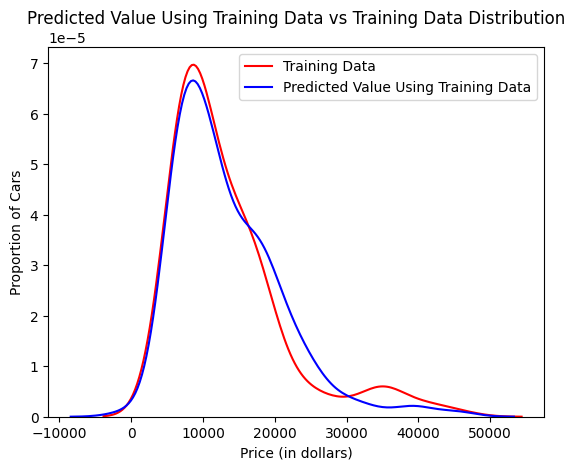

In [51]:
plt.figure()

ax = sns.kdeplot(Y_train, color="r", label="Training Data")
sns.kdeplot(Yhat_train, color="b", label="Predicted Value Using Training Data", ax=ax)

plt.title("Predicted Value Using Training Data vs Training Data Distribution")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")
plt.legend()
plt.show()

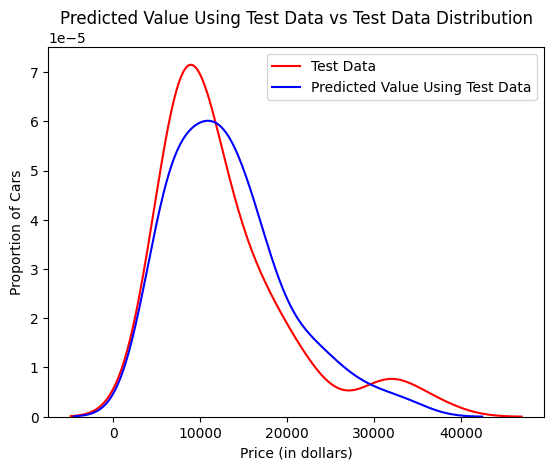

In [52]:
plt.figure()

ax = sns.kdeplot(Y_test, color="r", label="Test Data")
sns.kdeplot(Yhat_test, color="b", label="Predicted Value Using Test Data", ax=ax)

plt.title("Predicted Value Using Test Data vs Test Data Distribution")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")
plt.legend()
plt.show()

We can fix this overfitting problem by applying ridge regression with a regularization parameter alpha to each of the models. To do so, we find the most suitable value for alpha using grid search.

In [53]:
RR = Ridge()
Grid = GridSearchCV(RR, {"alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}, cv=4)

In [54]:
#Suitable value of alpha for simple linear ridge regression
Grid.fit(X, Y)
Best_simple_linear_RR = Grid.best_estimator_
Best_simple_linear_RR

Ridge(alpha=10000)

In [55]:
#Suitable value of alpha for polynomial ridge regression
Grid.fit(X_pr, Y)
Best_polynomial_RR = Grid.best_estimator_
Best_polynomial_RR

Ridge(alpha=10)

In [56]:
#Suitable value of alpha for multiple linear ridge regression
Grid.fit(X_multi, Y)
Best_multiple_linear_RR = Grid.best_estimator_
Best_polynomial_RR

Ridge(alpha=10)

So, the suitable values of regularization parameter alpha for the simple linear regression model, the polynomial regression model, and the multiple linear regression model are 10000, 10, and 10, respectively. Let's calculate the R squared and the mean squared error for each of these ridge regression models using cross validation.

In [57]:
Rcross = cross_val_score(Best_simple_linear_RR, X, Y, cv=4)
MSEcross = -1 * cross_val_score(Best_simple_linear_RR, X, Y, cv=4, scoring="neg_mean_squared_error")
print("The 4-fold cross validation R squared of the simple linear ridge regression model is:", Rcross.mean())
print("The 4-fold cross validation mean squared error of the simple linear ridge regression model is:", MSEcross.mean())

The 4-fold cross validation R squared of the simple linear ridge regression model is: 0.6763441821785745
The 4-fold cross validation mean squared error of the simple linear ridge regression model is: 15447621.5664153


In [58]:
Rcross = cross_val_score(Best_polynomial_RR, X_pr, Y, cv=4)
MSEcross = -1 * cross_val_score(Best_polynomial_RR, X_pr, Y, cv=4, scoring="neg_mean_squared_error")
print("The 4-fold cross validation R squared of the polynomial ridge regression model is:", Rcross.mean())
print("The 4-fold cross validation mean squared error of the polynomial ridge regression model is:", MSEcross.mean())

The 4-fold cross validation R squared of the polynomial ridge regression model is: 0.6773843891846212
The 4-fold cross validation mean squared error of the polynomial ridge regression model is: 15051810.973115709


In [59]:
Rcross = cross_val_score(Best_multiple_linear_RR, X_multi, Y, cv=4)
MSEcross = -1 * cross_val_score(Best_multiple_linear_RR, X_multi, Y, cv=4, scoring="neg_mean_squared_error")
print("The 4-fold cross validation R squared of the multiple linear ridge regression model is:", Rcross.mean())
print("The 4-fold cross validation mean squared error of the multiple linear ridge regression model is:", MSEcross.mean())

The 4-fold cross validation R squared of the multiple linear ridge regression model is: 0.672491712728475
The 4-fold cross validation mean squared error of the multiple linear ridge regression model is: 15912199.03777071


All of these ridge regression models have slightly higher accuracy than their corresponding regression models without regularizaton. In particular, out of these ridge regression models, the polynomial ridge regression model with alpha = 10 has the highest R squared and the lowest mean squared error. Therefore, out of the models built, the third order polynomial ridge regression model with alpha = 10 predicting car prices based on the feature "engine-size" is the most accurate.